In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv()


True

In [2]:
# load data
df = pd.read_csv('Data/roller_coasters.csv')

In [3]:
df

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating
...,...,...,...,...,...,...,...,...,...,...
2797,Dragon Challenge,Steel,Sit Down,NaN,NaN,NaN,0.0,Pinfari,Barry Island Pleasure Park,status.operating
2798,Wild Mouse,Steel,Spinning,NaN,NaN,NaN,0.0,Reverchon,Barry Island Pleasure Park,status.operating
2799,Unnamed Atlantica Supersplash Clone,Steel,Sit Down,80.0,30.0,390.0,0.0,Mack,Le Pal,status.announced
2800,Unknown Duelling Launch Coaster,Steel,na,NaN,NaN,NaN,0.0,na,Universal's Epic Universe,status.rumored


In [4]:
# get coordinates for park with google maps api
def get_coordinates(park):
    # load api key from environment variable
    api_key = os.getenv('APIKEY')
    # create url
    url = f'https://maps.googleapis.com/maps/api/place/textsearch/json?query={park}&key={api_key}'

    # get response
    response = requests.get(url)
    # get json
    json = response.json()
    # get lat and lng
    try:
        lat = json['results'][0]['geometry']['location']['lat']
        lng = json['results'][0]['geometry']['location']['lng']
    except:
        lat = np.nan
        lng = np.nan
    return lat, lng

In [5]:
# use tqdm to show progress
from tqdm import tqdm
tqdm.pandas()
# get unique parks
parks = df['park'].unique()
# create dataframe
parks = pd.DataFrame(parks, columns=['park'])
# get the coordinates for each park



In [6]:
parks

,park
0,Parc Asterix
1,Bobbejaanland
2,Terra Mítica
3,Walygator Parc
4,Le Pal
...,...
713,Chuanlord Holiday Manor
714,Conneaut Lake Park
715,Daqing Oilfield Paradise
716,Barry Island Pleasure Park


In [7]:
# lat = []
# lng = []
# for park in tqdm(parks['park']):
#     lat_, lng_ = get_coordinates(park)
#     lat.append(lat_)
#     lng.append(lng_)

In [8]:
len(parks)

718

In [9]:
# merge the coordinates with the roller coaster data
df = df.merge(parks, on='park')

In [10]:
df

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,SOS Numerobis,Steel,Sit Down,32.0,6.0,200.0,0.0,Zierer,Parc Asterix,status.operating
2,La Ronde des Rondins,Steel,Sit Down,26.0,3.0,60.0,0.0,Zierer,Parc Asterix,status.relocated
3,La Trace du Hourra,Steel,Bobsleigh,60.0,31.0,900.0,0.0,Mack,Parc Asterix,status.operating
4,Tonnerre de Zeus,Wooden,Sit Down,84.0,30.0,1233.0,0.0,CCI,Parc Asterix,status.operating
...,...,...,...,...,...,...,...,...,...,...
2797,Twin Helix,Steel,na,NaN,NaN,NaN,0.0,na,Daqing Oilfield Paradise,status.operating
2798,Cyclone,Steel,Sit Down,NaN,NaN,NaN,0.0,SBF,Barry Island Pleasure Park,status.operating
2799,Dragon Challenge,Steel,Sit Down,NaN,NaN,NaN,0.0,Pinfari,Barry Island Pleasure Park,status.operating
2800,Wild Mouse,Steel,Spinning,NaN,NaN,NaN,0.0,Reverchon,Barry Island Pleasure Park,status.operating


In [11]:
# save the data
#df.to_csv('Data/roller_coasters_with_coordinates.csv', index=False)


In [12]:
df = pd.read_csv('Data/roller_coasters_with_coordinates.csv')

In [13]:
df

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,lat,lng
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating,49.134184,2.571230
1,SOS Numerobis,Steel,Sit Down,32.0,6.0,200.0,0.0,Zierer,Parc Asterix,status.operating,49.134184,2.571230
2,La Ronde des Rondins,Steel,Sit Down,26.0,3.0,60.0,0.0,Zierer,Parc Asterix,status.relocated,49.134184,2.571230
3,La Trace du Hourra,Steel,Bobsleigh,60.0,31.0,900.0,0.0,Mack,Parc Asterix,status.operating,49.134184,2.571230
4,Tonnerre de Zeus,Wooden,Sit Down,84.0,30.0,1233.0,0.0,CCI,Parc Asterix,status.operating,49.134184,2.571230
...,...,...,...,...,...,...,...,...,...,...,...,...
2797,Twin Helix,Steel,na,NaN,NaN,NaN,0.0,na,Daqing Oilfield Paradise,status.operating,46.607195,124.865746
2798,Cyclone,Steel,Sit Down,NaN,NaN,NaN,0.0,SBF,Barry Island Pleasure Park,status.operating,51.391657,-3.274418
2799,Dragon Challenge,Steel,Sit Down,NaN,NaN,NaN,0.0,Pinfari,Barry Island Pleasure Park,status.operating,51.391657,-3.274418
2800,Wild Mouse,Steel,Spinning,NaN,NaN,NaN,0.0,Reverchon,Barry Island Pleasure Park,status.operating,51.391657,-3.274418


In [14]:
# get parks coordinates
parks = df[['park', 'lat', 'lng']].drop_duplicates()


In [15]:
parks

,park,lat,lng
0,Parc Asterix,49.134184,2.571230
9,Bobbejaanland,51.200696,4.903926
19,Terra Mítica,38.560862,-0.158294
25,Walygator Parc,49.224945,6.159581
30,Le Pal,46.509026,3.625388
...,...,...,...
2782,Chuanlord Holiday Manor,22.838200,113.199000
2790,Conneaut Lake Park,41.635699,-80.316587
2794,Daqing Oilfield Paradise,46.607195,124.865746
2798,Barry Island Pleasure Park,51.391657,-3.274418


In [16]:
# load data
golden_ticket = pd.read_csv('Data/Golden_Ticket_Award_Winners_Steel.csv')

In [17]:
parks

,park,lat,lng
0,Parc Asterix,49.134184,2.571230
9,Bobbejaanland,51.200696,4.903926
19,Terra Mítica,38.560862,-0.158294
25,Walygator Parc,49.224945,6.159581
30,Le Pal,46.509026,3.625388
...,...,...,...
2782,Chuanlord Holiday Manor,22.838200,113.199000
2790,Conneaut Lake Park,41.635699,-80.316587
2794,Daqing Oilfield Paradise,46.607195,124.865746
2798,Barry Island Pleasure Park,51.391657,-3.274418


In [18]:
golden_ticket

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018


In [19]:
# rename the Park column to park
golden_ticket = golden_ticket.rename(columns={'Park': 'park'})
# mertge the data on park
golden_ticket = golden_ticket.merge(parks, on='park')


In [20]:
golden_ticket

,Rank,Name,park,Location,Supplier,Year Built,Points,Year of Rank,lat,lng
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013,53.306422,-6.364769
1,9,Magnum XL-200,Cedar Point,"Sandusky, Ohio",Arrow,1989,416,2013,53.306422,-6.364769
2,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1139,2014,53.306422,-6.364769
3,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1205,2015,53.306422,-6.364769
4,2,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1122,2016,53.306422,-6.364769
...,...,...,...,...,...,...,...,...,...,...
149,24,Skyrush,Hersheypark,"Hershey, Pa.",Intamin,2012,235,2017,40.288781,-76.654747
150,30,Skyrush,Hersheypark,"Hershey, Pa.",Intamin,2012,173,2018,40.288781,-76.654747
151,18,Time Traveler,Silver Dollar City,"Branson, Mo.",Mack,2018,248,2018,36.671457,-93.339498
152,39,Jetline,Gröna Lund,"Stockholm, Sweden",Schwarzkopf,1988,99,2018,59.323356,18.096390


In [21]:
# to geoppandas dataframe
import geopandas as gpd

# create a geodataframe
golden_ticket = gpd.GeoDataFrame(golden_ticket, geometry=gpd.points_from_xy(golden_ticket.lng, golden_ticket.lat))

/Users/christopherlohse/Library/Caches/pypoetry/virtualenvs/data-viz-kernel-gMZse9BV-py3.8/lib/python3.8/site-packages/pyproj/__init__.py:92: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_DATA (PROJ 9.1+) | PROJ_LIB (PROJ<9.1) or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [22]:
golden_ticket

,Rank,Name,park,Location,Supplier,Year Built,Points,Year of Rank,lat,lng,geometry
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013,53.306422,-6.364769,POINT (-6.36477 53.30642)
1,9,Magnum XL-200,Cedar Point,"Sandusky, Ohio",Arrow,1989,416,2013,53.306422,-6.364769,POINT (-6.36477 53.30642)
2,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1139,2014,53.306422,-6.364769,POINT (-6.36477 53.30642)
3,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1205,2015,53.306422,-6.364769,POINT (-6.36477 53.30642)
4,2,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1122,2016,53.306422,-6.364769,POINT (-6.36477 53.30642)
...,...,...,...,...,...,...,...,...,...,...,...
149,24,Skyrush,Hersheypark,"Hershey, Pa.",Intamin,2012,235,2017,40.288781,-76.654747,POINT (-76.65475 40.28878)
150,30,Skyrush,Hersheypark,"Hershey, Pa.",Intamin,2012,173,2018,40.288781,-76.654747,POINT (-76.65475 40.28878)
151,18,Time Traveler,Silver Dollar City,"Branson, Mo.",Mack,2018,248,2018,36.671457,-93.339498,POINT (-93.33950 36.67146)
152,39,Jetline,Gröna Lund,"Stockholm, Sweden",Schwarzkopf,1988,99,2018,59.323356,18.096390,POINT (18.09639 59.32336)


In [23]:
# get year build for each roller coaster in golden ticket data

year_build =  golden_ticket[['Name', 'Year Built']].drop_duplicates()



In [24]:
year_build

,Name,Year Built
0,Millennium Force,2000
1,Magnum XL-200,1989
5,Maverick,2007
7,Top Thrill Dragster,2003
8,Raptor,1994
9,GateKeeper,2013
15,Steel Vengeance,2018
19,Bizarro,2000
22,Superman The Ride,2000
23,Wicked Cyclone,2015


<AxesSubplot: >

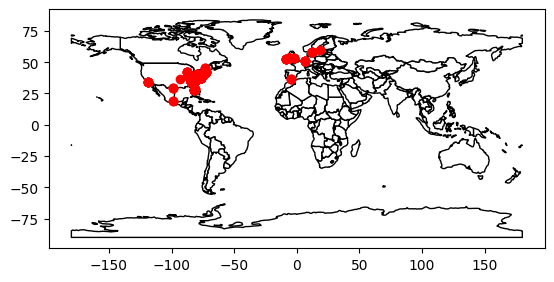

In [25]:
# plot the data

# get geojson of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# plot the world
#world.plot()
# plot the world and the roller coasters
ax = world.plot(color='white', edgecolor='black')
golden_ticket.plot(ax=ax, color='red')



In [26]:
roller_coasters = df.groupby('park').count()['name'].reset_index()
# get the coordinates for each park
roller_coasters = roller_coasters.merge(parks, on='park')
# create a geodataframe
roller_coasters = gpd.GeoDataFrame(roller_coasters, geometry=gpd.points_from_xy(roller_coasters.lng, roller_coasters.lat))
%matplotlib inline

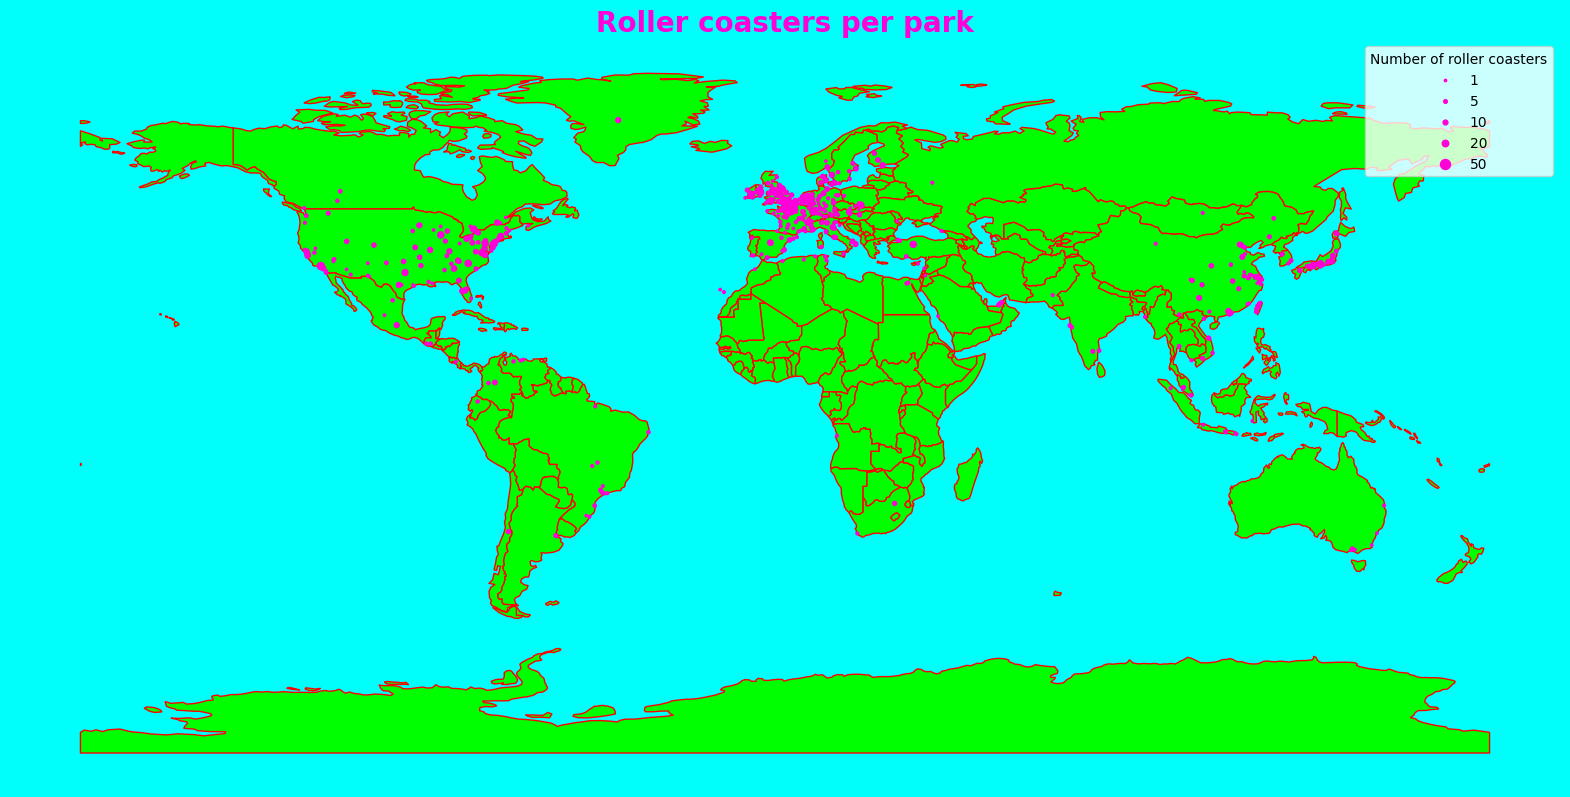

In [27]:
# set plot size
fig, ax = plt.subplots(figsize=(20, 10))

# plot the world colored green and the edges colored red color the ocean blue
world.plot(ax=ax, color='#00ff00', edgecolor='#ff0000', facecolor='#ff00d8')

# plot the points with the number of roller coaster as size
roller_coasters.plot(ax=ax, markersize=roller_coasters['name']+2, c='#ff00d8')
# remove colorbarscale from axis
ax.axis('off')
# create legend with number of roller coasters per park and the size of the points+
ax.legend(handles=[plt.scatter([],[], s=i+2, color='#ff00d8') for i in [1, 5, 10, 20, 50]], labels=['1', '5', '10', '20', '50'], title='Number of roller coasters')

# set background color for figure
fig.set_facecolor('#00fffb')

# set title
ax.set_title('Roller coasters per park', fontsize=20, fontweight='bold', color='#ff00d8')
# create zoomable map
plt.show()


In [28]:
# create a animated plot over time of award winners

<AxesSubplot: >

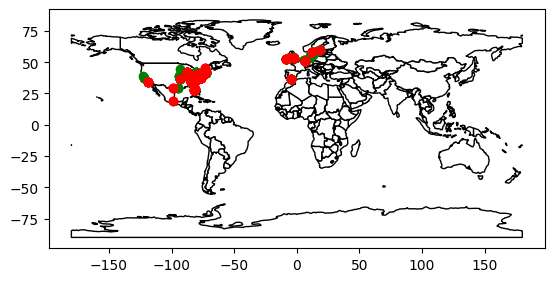

In [29]:
# load wood data
wood = pd.read_csv('Data/Golden_Ticket_Award_Winners_Wood.csv')
# rename the Park column to park
wood = wood.rename(columns={'Park': 'park'})
# mertge the data on park
wood = wood.merge(parks, on='park')
# to geoppandas dataframe
wood = gpd.GeoDataFrame(wood, geometry=gpd.points_from_xy(wood.lng, wood.lat))
# plot the data
ax = world.plot(color='white', edgecolor='black')
wood.plot(ax=ax, color='green')
# plot steel 
golden_ticket.plot(ax=ax, color='red')


In [30]:
# get year build for each roller coaster in golden ticket data
year_build_2 =  wood[['Name', 'Year Built']].drop_duplicates()
# merge the data
year_build = pd.concat([year_build, year_build_2])


year_build

,Name,Year Built
0,Millennium Force,2000
1,Magnum XL-200,1989
5,Maverick,2007
7,Top Thrill Dragster,2003
8,Raptor,1994
...,...,...
118,Grizzly,1982
119,Renegade,2007
120,Rutschebanan,1914
121,Wild One,1986


In [31]:
wood

,Rank,Name,park,Location,Supplier,Year Built,Points,Year of Rank,lat,lng,geometry
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013,41.645137,-72.912420,POINT (-72.91242 41.64514)
1,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1480,2014,41.645137,-72.912420,POINT (-72.91242 41.64514)
2,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1625,2015,41.645137,-72.912420,POINT (-72.91242 41.64514)
3,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1216,2016,41.645137,-72.912420,POINT (-72.91242 41.64514)
4,3,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1171,2017,41.645137,-72.912420,POINT (-72.91242 41.64514)
...,...,...,...,...,...,...,...,...,...,...,...
118,40,Grizzly,Kings Dominion,"Doswell, Va.",Summers-KECO,1982,115,2018,37.839871,-77.444191,POINT (-77.44419 37.83987)
119,26,Renegade,Valleyfair,"Shakopee, Minn.",Great Coasters Int.,2007,182,2018,44.798743,-93.453691,POINT (-93.45369 44.79874)
120,35,Rutschebanan,Tivoli Gardens,"Copenhagen, Denmark",L.A. Thompson,1914,135,2018,55.673684,12.568147,POINT (12.56815 55.67368)
121,44,Wild One,Six Flags America,"Upper Marlboro, Md.",PTC/Miller/Dinn,1986,98,2018,38.906112,-76.772582,POINT (-76.77258 38.90611)


In [32]:
df

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,lat,lng
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating,49.134184,2.571230
1,SOS Numerobis,Steel,Sit Down,32.0,6.0,200.0,0.0,Zierer,Parc Asterix,status.operating,49.134184,2.571230
2,La Ronde des Rondins,Steel,Sit Down,26.0,3.0,60.0,0.0,Zierer,Parc Asterix,status.relocated,49.134184,2.571230
3,La Trace du Hourra,Steel,Bobsleigh,60.0,31.0,900.0,0.0,Mack,Parc Asterix,status.operating,49.134184,2.571230
4,Tonnerre de Zeus,Wooden,Sit Down,84.0,30.0,1233.0,0.0,CCI,Parc Asterix,status.operating,49.134184,2.571230
...,...,...,...,...,...,...,...,...,...,...,...,...
2797,Twin Helix,Steel,na,NaN,NaN,NaN,0.0,na,Daqing Oilfield Paradise,status.operating,46.607195,124.865746
2798,Cyclone,Steel,Sit Down,NaN,NaN,NaN,0.0,SBF,Barry Island Pleasure Park,status.operating,51.391657,-3.274418
2799,Dragon Challenge,Steel,Sit Down,NaN,NaN,NaN,0.0,Pinfari,Barry Island Pleasure Park,status.operating,51.391657,-3.274418
2800,Wild Mouse,Steel,Spinning,NaN,NaN,NaN,0.0,Reverchon,Barry Island Pleasure Park,status.operating,51.391657,-3.274418


In [33]:
year_build
# reaname Name to name
year_build = year_build.rename(columns={'Name': 'name'})

In [34]:
# merge into df with all roller coasters
df = pd.merge(df, year_build, on="name", how='left')


In [35]:
df
# get df for every entry having year built
df_ = df[df['Year Built'].notna()]
df_

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,lat,lng,Year Built
153,Nemesis,Steel,Inverted,81.0,13.0,716.0,4.0,B&M,Alton Towers,status.operating,52.987437,-1.886451,1994.0
193,Raptor,Steel,Wing,90.0,33.0,770.0,3.0,B&M,Gardaland,status.operating,45.454949,10.713703,1994.0
218,Cyclone,Steel,Sit Down,68.0,18.0,762.0,0.0,Charles Paige,Southport Pleasureland,status.closed.definitely,53.647679,-3.017450,1927.0
245,Wild Mouse,Steel,Sit Down,45.0,15.0,370.0,0.0,Maurer,Flamingo Land Theme Park and Zoo,status.closed.definitely,54.206512,-0.809531,1958.0
264,Wild Mouse,Wooden,Sit Down,NaN,NaN,390.0,0.0,na,Blackpool Pleasure Beach,status.closed.definitely,53.792330,-3.055293,1958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,Wild Mouse,na,na,NaN,NaN,NaN,0.0,na,Arnolds Park,status.construction,43.372741,-95.123884,1958.0
2802,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1938.0
2803,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1964.0
2811,Cyclone,Steel,Sit Down,NaN,NaN,NaN,0.0,SBF,Barry Island Pleasure Park,status.operating,51.391657,-3.274418,1927.0


In [36]:
# create colors for first three places
colors = ['#FFD700', '#C0C0C0', '#CD7F32']


In [37]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

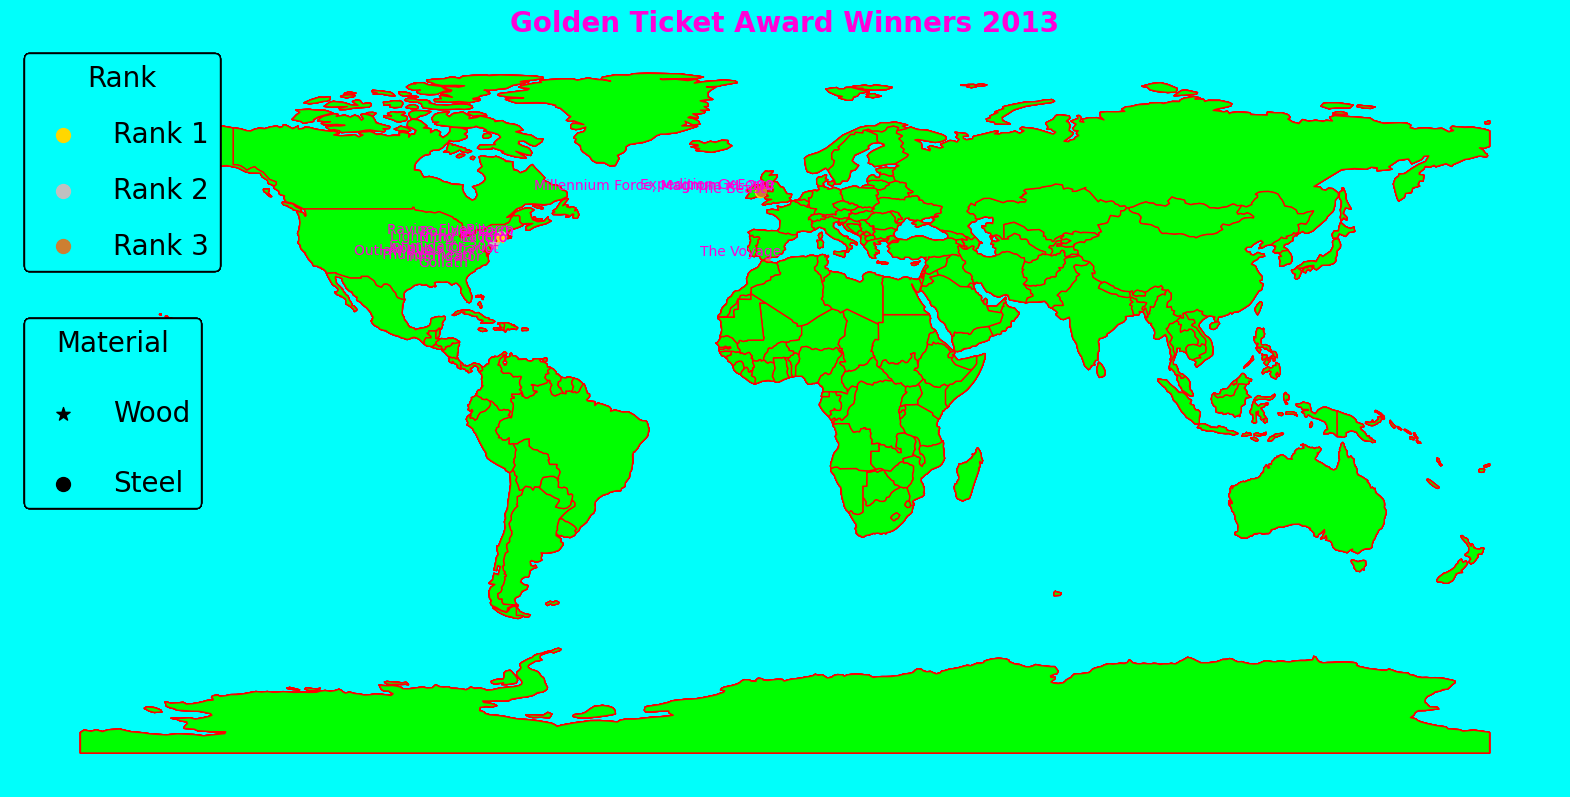

In [38]:
# create a animated plot over time of award winners

# sort by year
golden_ticket = golden_ticket.sort_values("Year of Rank")
# create a list of years
years = golden_ticket["Year of Rank"].unique()
# animate over years in a matplotlib plot mp4
from matplotlib.animation import FuncAnimation
# set plot size
fig, ax = plt.subplots(figsize=(20, 10))
# set background color for figure
fig.set_facecolor("#00fffb")
# set title
ax.set_title(
    "Golden Ticket Award Winners", fontsize=20, fontweight="bold", color="#ff00d8"
)
ann_list = []
# create zoomable map
def animate(i):
     # remove old annotations
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    # create a list to store the annotations
  
   

    # plot the world colored green and the edges colored red color the ocean blue
    world.plot(ax=ax, color="#00ff00", edgecolor="#ff0000")
    # plot the steel award winners for rank 1 to 3 for the year i color them red label them with their rank
    for j in range(3):
        golden_ticket[
            (golden_ticket["Year of Rank"] == years[i])
            & (golden_ticket["Rank"] == j + 1)
        ].plot(
            ax=ax,
            color=colors[j],
            label=f"Rank {j+1}",
            markersize= 50, 
            marker="o",
        )
   

    # annotate the name of the roller coaster
    for x, y, label in zip(
        golden_ticket[golden_ticket["Year of Rank"] == years[i]]["geometry"].x,
        golden_ticket[golden_ticket["Year of Rank"] == years[i]]["geometry"].y,
        golden_ticket[golden_ticket["Year of Rank"] == years[i]]["Name"],
    ):
        if x in [ann.xy[0] for ann in ann_list] and y in [ann.xy[1] for ann in ann_list]:
            # change label
            for ann in ann_list:
                if ann.xy[0] == x and ann.xy[1] == y:
                    ann.set_text(ann.get_text() + f', {label}')
                    continue
        ann_1 =ax.annotate(
            label,
            textcoords= "offset points",
            xy=(x, y),
            xytext=(10, 10),
            horizontalalignment='right', verticalalignment='top',
            color="#ff00d8",
            fontsize=10,
        )
        ann_list.append(ann_1)

  
    # same for wood
    for j in range(3):
        wood[
            (wood["Year of Rank"] == years[i]) & (wood["Rank"] == j + 1)
        ].plot(
            ax=ax,
            color=colors[j],
            label=f"Rank {j+1}",
            markersize= 50, 
            marker="*",

        )
    # annotate the name of the roller coaster check if park already in list
    for x, y, label in zip(
        wood[wood["Year of Rank"] == years[i]]["geometry"].x,
        wood[wood["Year of Rank"] == years[i]]["geometry"].y,
        wood[wood["Year of Rank"] == years[i]]["Name"],
    ):  
        # check if already annotated at this point
        if x in [ann.xy[0] for ann in ann_list] and y in [ann.xy[1] for ann in ann_list]:
            # change label
            for ann in ann_list:
                if ann.xy[0] == x and ann.xy[1] == y:
                    ann.set_text(ann.get_text() + f', {label}')
                    continue
        # annotate with an arrow pointing to the point
        ann_2 = ax.annotate(
            label,
            textcoords= "offset points",
            xy=(x, y),
            horizontalalignment='right', verticalalignment='top',
            xytext=(10, 10),
            color="#ff00d8",
            fontsize=10,
        )

        ann_list.append(ann_2)

        # remove old annotations

        
    

    ax.set_title(
        f"Golden Ticket Award Winners {years[i]}",
        fontsize=20,
        fontweight="bold",
        color="#ff00d8",
    )
    ax.axis("off")
    fig.set_facecolor("#00fffb")
     #add legend for color
    handle_1 = plt.scatter([],[], s=100, color='#FFD700', marker="o")
    handle_2 = plt.scatter([],[], s=100, color='#C0C0C0', marker="o")
    handle_3 = plt.scatter([],[], s=100, color='#CD7F32', marker="o")
    handle_4 = plt.scatter([],[], s=100, color='black', marker="*")
    handle_5 = plt.scatter([],[], s=100, color='black', marker="o")
    legend1 = ax.legend([handle_1, handle_2, handle_3], ['Rank 1', 'Rank 2', 'Rank 3'], loc=2, title="Rank" , facecolor="#00fffb", edgecolor="black", framealpha=1, title_fontsize=20, fontsize=20, labelspacing=1.)
    legend2 = ax.legend([handle_4, handle_5], ['Wood', 'Steel'], loc=6, title="Material", facecolor="#00fffb", edgecolor="black", framealpha=1, title_fontsize=20, fontsize=20, labelspacing=1.5)
    ax.add_artist(legend1)
    ax.add_artist(legend2)

# create animation
anim = FuncAnimation(fig, animate, frames=len(years), interval=1000)
# # save animation
anim.save("Data/roller_coasters.gif", fps=1, writer="pillow")

from IPython.display import Image
Image(url='Data/roller_coasters.gif')


In [39]:
df_

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,lat,lng,Year Built
153,Nemesis,Steel,Inverted,81.0,13.0,716.0,4.0,B&M,Alton Towers,status.operating,52.987437,-1.886451,1994.0
193,Raptor,Steel,Wing,90.0,33.0,770.0,3.0,B&M,Gardaland,status.operating,45.454949,10.713703,1994.0
218,Cyclone,Steel,Sit Down,68.0,18.0,762.0,0.0,Charles Paige,Southport Pleasureland,status.closed.definitely,53.647679,-3.017450,1927.0
245,Wild Mouse,Steel,Sit Down,45.0,15.0,370.0,0.0,Maurer,Flamingo Land Theme Park and Zoo,status.closed.definitely,54.206512,-0.809531,1958.0
264,Wild Mouse,Wooden,Sit Down,NaN,NaN,390.0,0.0,na,Blackpool Pleasure Beach,status.closed.definitely,53.792330,-3.055293,1958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,Wild Mouse,na,na,NaN,NaN,NaN,0.0,na,Arnolds Park,status.construction,43.372741,-95.123884,1958.0
2802,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1938.0
2803,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1964.0
2811,Cyclone,Steel,Sit Down,NaN,NaN,NaN,0.0,SBF,Barry Island Pleasure Park,status.operating,51.391657,-3.274418,1927.0


In [40]:
years

array([2013, 2014, 2015, 2016, 2017, 2018])

In [41]:
# df_ to geodataframe
df_ = gpd.GeoDataFrame(df_, geometry=gpd.points_from_xy(df_.lng, df_.lat))

In [42]:
df_

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,lat,lng,Year Built,geometry
153,Nemesis,Steel,Inverted,81.0,13.0,716.0,4.0,B&M,Alton Towers,status.operating,52.987437,-1.886451,1994.0,POINT (-1.88645 52.98744)
193,Raptor,Steel,Wing,90.0,33.0,770.0,3.0,B&M,Gardaland,status.operating,45.454949,10.713703,1994.0,POINT (10.71370 45.45495)
218,Cyclone,Steel,Sit Down,68.0,18.0,762.0,0.0,Charles Paige,Southport Pleasureland,status.closed.definitely,53.647679,-3.017450,1927.0,POINT (-3.01745 53.64768)
245,Wild Mouse,Steel,Sit Down,45.0,15.0,370.0,0.0,Maurer,Flamingo Land Theme Park and Zoo,status.closed.definitely,54.206512,-0.809531,1958.0,POINT (-0.80953 54.20651)
264,Wild Mouse,Wooden,Sit Down,NaN,NaN,390.0,0.0,na,Blackpool Pleasure Beach,status.closed.definitely,53.792330,-3.055293,1958.0,POINT (-3.05529 53.79233)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,Wild Mouse,na,na,NaN,NaN,NaN,0.0,na,Arnolds Park,status.construction,43.372741,-95.123884,1958.0,POINT (-95.12388 43.37274)
2802,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1938.0,POINT (-80.31659 41.63570)
2803,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1964.0,POINT (-80.31659 41.63570)
2811,Cyclone,Steel,Sit Down,NaN,NaN,NaN,0.0,SBF,Barry Island Pleasure Park,status.operating,51.391657,-3.274418,1927.0,POINT (-3.27442 51.39166)


In [43]:
wood

,Rank,Name,park,Location,Supplier,Year Built,Points,Year of Rank,lat,lng,geometry
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013,41.645137,-72.912420,POINT (-72.91242 41.64514)
1,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1480,2014,41.645137,-72.912420,POINT (-72.91242 41.64514)
2,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1625,2015,41.645137,-72.912420,POINT (-72.91242 41.64514)
3,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1216,2016,41.645137,-72.912420,POINT (-72.91242 41.64514)
4,3,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1171,2017,41.645137,-72.912420,POINT (-72.91242 41.64514)
...,...,...,...,...,...,...,...,...,...,...,...
118,40,Grizzly,Kings Dominion,"Doswell, Va.",Summers-KECO,1982,115,2018,37.839871,-77.444191,POINT (-77.44419 37.83987)
119,26,Renegade,Valleyfair,"Shakopee, Minn.",Great Coasters Int.,2007,182,2018,44.798743,-93.453691,POINT (-93.45369 44.79874)
120,35,Rutschebanan,Tivoli Gardens,"Copenhagen, Denmark",L.A. Thompson,1914,135,2018,55.673684,12.568147,POINT (12.56815 55.67368)
121,44,Wild One,Six Flags America,"Upper Marlboro, Md.",PTC/Miller/Dinn,1986,98,2018,38.906112,-76.772582,POINT (-76.77258 38.90611)


In [44]:
golden_ticket

,Rank,Name,park,Location,Supplier,Year Built,Points,Year of Rank,lat,lng,geometry
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013,53.306422,-6.364769,POINT (-6.36477 53.30642)
1,9,Magnum XL-200,Cedar Point,"Sandusky, Ohio",Arrow,1989,416,2013,53.306422,-6.364769,POINT (-6.36477 53.30642)
71,10,Intimidator-305,Kings Dominion,"Doswell, Va.",Intamin,2010,412,2013,37.839871,-77.444191,POINT (-77.44419 37.83987)
61,8,Intimidator,Carowinds,"Charlotte, N.C.",B&M,2010,478,2013,35.104552,-80.939351,POINT (-80.93935 35.10455)
53,7,Goliath,Six Flags Over Georgia,"Austell, Ga.",B&M,2006,494,2013,33.770670,-84.551097,POINT (-84.55110 33.77067)
...,...,...,...,...,...,...,...,...,...,...,...
107,24,Twisted Colossus,Six Flags Magic Mountain,"Valencia, Calif.",Rocky Mountain,2015,212,2018,34.425331,-118.597219,POINT (-118.59722 34.42533)
108,31,X2,Six Flags Magic Mountain,"Valencia, Calif.",Arrow,2001,162,2018,34.425331,-118.597219,POINT (-118.59722 34.42533)
113,15,Taron,Phantasialand,"Brühl, Germany",Intamin,2016,283,2018,50.799996,6.881022,POINT (6.88102 50.80000)
74,12,Intimidator 305,Kings Dominion,"Doswell, Va.",Intamin,2010,344,2018,37.839871,-77.444191,POINT (-77.44419 37.83987)


In [45]:
df_

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,lat,lng,Year Built,geometry
153,Nemesis,Steel,Inverted,81.0,13.0,716.0,4.0,B&M,Alton Towers,status.operating,52.987437,-1.886451,1994.0,POINT (-1.88645 52.98744)
193,Raptor,Steel,Wing,90.0,33.0,770.0,3.0,B&M,Gardaland,status.operating,45.454949,10.713703,1994.0,POINT (10.71370 45.45495)
218,Cyclone,Steel,Sit Down,68.0,18.0,762.0,0.0,Charles Paige,Southport Pleasureland,status.closed.definitely,53.647679,-3.017450,1927.0,POINT (-3.01745 53.64768)
245,Wild Mouse,Steel,Sit Down,45.0,15.0,370.0,0.0,Maurer,Flamingo Land Theme Park and Zoo,status.closed.definitely,54.206512,-0.809531,1958.0,POINT (-0.80953 54.20651)
264,Wild Mouse,Wooden,Sit Down,NaN,NaN,390.0,0.0,na,Blackpool Pleasure Beach,status.closed.definitely,53.792330,-3.055293,1958.0,POINT (-3.05529 53.79233)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,Wild Mouse,na,na,NaN,NaN,NaN,0.0,na,Arnolds Park,status.construction,43.372741,-95.123884,1958.0,POINT (-95.12388 43.37274)
2802,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1938.0,POINT (-80.31659 41.63570)
2803,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1964.0,POINT (-80.31659 41.63570)
2811,Cyclone,Steel,Sit Down,NaN,NaN,NaN,0.0,SBF,Barry Island Pleasure Park,status.operating,51.391657,-3.274418,1927.0,POINT (-3.27442 51.39166)


In [46]:
attributes = [
    "height",
    "length",
    "speed",
    "num_inversions",
    "Points",
    #"seating_type",
]

In [47]:
wood
wood_rank_1 = wood[wood["Rank"] == 1]
wood_rank_1

# rename Name to name
wood_rank_1 = wood_rank_1.rename(columns={"Name": "name"})

# merge with df to get attributes
df_wood_rank_1 = pd.merge(df_, wood_rank_1, on=["park", "name"], how="inner")
df_wood_rank_1
# remove duplicates
df_wood_rank_1 = df_wood_rank_1.drop_duplicates(subset=["park", "name"])
df_wood_rank_1

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,...,geometry_x,Rank,Location,Supplier,Year Built_y,Points,Year of Rank,lat_y,lng_y,geometry_y
0,El Toro,Wooden,Sit Down,113.0,55.0,1341.0,0.0,Intamin,Six Flags Great Adventure,status.operating,...,POINT (-74.43616 40.13606),1,"Jackson, N.J.",Intamin,2009,1241,2017,40.136060,-74.436163,POINT (-74.43616 40.13606)
2,Boulder Dash,Wooden,Sit Down,97.0,35.0,1440.0,0.0,CCI,Lake Compounce,status.operating,...,POINT (-72.91242 41.64514),1,"Bristol, Conn.",CCI,2000,1333,2013,41.645137,-72.912420,POINT (-72.91242 41.64514)


In [48]:
# same for steel
steel_rank_1 = golden_ticket[golden_ticket["Rank"] == 1]
steel_rank_1 = steel_rank_1.rename(columns={"Name": "name"})
df_steel_rank_1 = pd.merge(df_, steel_rank_1,on=["park", "name"], how="inner")
df_steel_rank_1

# remove duplicates
df_steel_rank_1 = df_steel_rank_1.drop_duplicates(subset=["park", "name"])
df_steel_rank_1

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,...,geometry_x,Rank,Location,Supplier,Year Built_y,Points,Year of Rank,lat_y,lng_y,geometry_y
0,Millennium Force,Steel,Sit Down,150.0,94.0,2010.0,0.0,Intamin,Cedar Point,status.operating,...,POINT (-6.36477 53.30642),1,"Sandusky, Ohio",Intamin,2000,1204,2013,53.306422,-6.364769,POINT (-6.36477 53.30642)
3,Fury 325,Steel,Sit Down,153.0,99.0,2012.0,0.0,B&M,Carowinds,status.operating,...,POINT (-80.93935 35.10455),1,"Charlotte, N.C.",B&M,2015,1126,2016,35.104552,-80.939351,POINT (-80.93935 35.10455)


In [49]:
# now the last ranks
# get the max rank possible
min_rank = wood["Rank"].max()
# get the data for the last rank
wood_rank_3 = wood[wood["Rank"] == min_rank]
# rename Name to name
wood_rank_3 = wood_rank_3.rename(columns={"Name": "name"})
# merge with df on park and name to get attributes
df_wood_rank_3 = pd.merge(df_, wood_rank_3, on=["park", "name"], how="inner")
df_wood_rank_3

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,...,geometry_x,Rank,Location,Supplier,Year Built_y,Points,Year of Rank,lat_y,lng_y,geometry_y
0,Twister,Wooden,Sit Down,61.0,15.0,480.0,0.0,Gravity Group,Gröna Lund,status.operating,...,POINT (18.09639 59.32336),50,"Stockholm, Sweden",Gravity Group,2011,66,2017,59.323356,18.096390,POINT (18.09639 59.32336)
1,Boardwalk Bullet,Wooden,Sit Down,82.0,29.0,986.0,0.0,Gravity Group,Kemah Boardwalk,status.operating,...,POINT (-95.02020 29.54732),50,"Kemah, Texas",M&V/The Gravity Group,2007,73,2016,29.547322,-95.020205,POINT (-95.02020 29.54732)


In [50]:
# same for steel
steel_rank_3 = golden_ticket[golden_ticket["Rank"] == min_rank]
steel_rank_3 = steel_rank_3.rename(columns={"Name": "name"})
df_steel_rank_3 = pd.merge(df_, steel_rank_3, on=["park", "name"], how="inner")
df_steel_rank_3


,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,...,geometry_x,Rank,Location,Supplier,Year Built_y,Points,Year of Rank,lat_y,lng_y,geometry_y
0,Full Throttle,Steel,Sit Down,112.0,48.0,670.0,2.0,Premier Rides,Six Flags Magic Mountain,status.operating,...,POINT (-118.59722 34.42533),50,"Valencia, Calif.",Premier,2013,59,2017,34.425331,-118.597219,POINT (-118.59722 34.42533)
1,Whizzer,Steel,Sit Down,68.0,21.0,945.0,0.0,Schwarzkopf,Six Flags Great America,status.operating,...,POINT (-87.93603 42.37062),50,"Gurnee, Ill.",Schwarzkopf,1976,70,2018,42.370621,-87.936026,POINT (-87.93603 42.37062)


In [51]:
attributes = [
    "height",
    "length",
    "speed",
    "num_inversions",
    "Points",
    #"seating_type",
]
# color for each attribute in attributes
color_a = ["#FFD700", "#C0C0C0", "#CD7F32", "green", "#ff00d8"]

# to dict for easier access
color_dict = dict(zip(attributes, color_a))

color_dict

{'height': '#FFD700',
 'length': '#C0C0C0',
 'speed': '#CD7F32',
 'num_inversions': 'green',
 'Points': '#ff00d8'}

In [52]:
# get unique seating types
seating_types = df_["seating_type"].unique()
seating_types
# give a color to each of the seven seating types
color_s = ["#FFD700", "#C0C0C0", "#CD7F32", "green", "#ff00d8", "black", "blue"]

# to dict for easier access
color_dict_s = dict(zip(seating_types, color_s))

In [53]:
# def plot_radar(ax, df):
#     # set title
#     ax.set_title(
#         df["name"], fontsize=20, fontweight="bold", color="#ff00d8"
#     )
#     # set background color
#     ax.set_facecolor("#00fffb")
#     attributes = [
#         "height",
#         "length",
#         "speed",
#         "num_inversions",
#         #"seating_type",
#     ]

#     # number of variables
#     N = len(attributes)
#     label_loc = np.linspace(start=0, stop=2 * np.pi, num=N, endpoint=False)
#     value = df[attributes].values.flatten().tolist()
#     # get the color based on the seating type
#     color = color_dict_s[df["seating_type"]]
#     # add a legend for the seating type

#     # plot
#     ax.plot(
#         label_loc,
#         value,
#         color=color,
#         linewidth=2,
#         linestyle="solid",
#         marker="o",
#     )
#     # add theta labels to axis
#     ax.set_thetagrids(
#         label_loc * (180 / np.pi), attributes, fontsize=10, color="#ff00d8"
#     )
#     # fill area
#     ax.fill(label_loc, value, color="#ff00d8", alpha=0.1)

In [54]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='polygon'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [55]:
theta = radar_factory(len(attributes), frame='circle')

In [56]:
def plot_radar_2(ax, df):
    attributes = [
        "height",
        "length",
        "speed",
        "num_inversions",
        #"seating_type",
        "Points",
    ]
    # check if points is in the dataframe
    if "Points" not in df:
        df["Points"] = 0
    
    ax.set_title(
        "Featured Roller Coaster: " + df["name"] , fontsize=25, fontweight="bold", color="#ff00d8",
        y=1.1
    )
    # change the title position

    # set background color
    ax.set_facecolor("#00fffb")
    

    # number of variables
    N = len(attributes)

    #label_loc = np.linspace(start=0, stop=2 * np.pi, num=N, endpoint=False)
    value = df[attributes].values.flatten().tolist()
    # get the color based on the seating type
    color = color_dict_s[df["seating_type"]]
    # add a legend for the seating type

    # plot using theta and value
    ax.plot(
        theta,
        value,
        color=color,
        linewidth=2,
        linestyle="solid",
        marker="o",
    )
    # remove the frame
    ax.set_frame_on(False)
    # set the grid to be transparent
    ax.grid(color="#ff00d8", alpha=0.5)

    # add theta labels to axis
    ax.set_thetagrids(theta * 180 / np.pi, attributes, color="#ff00d8", fontsize=12)
    # ad quadratic border
    ax.spines["polar"].set_linestyle("-")
    ax.spines["polar"].set_linewidth(2)
    ax.spines["polar"].set_color("#ff00d8")
    # reset the frame
    
    ax.set_frame_on(True)

    # fill area
    ax.fill(theta, value, color="#ff00d8", alpha=0.1)

    # set face color
    ax.set_facecolor("#00fffb")

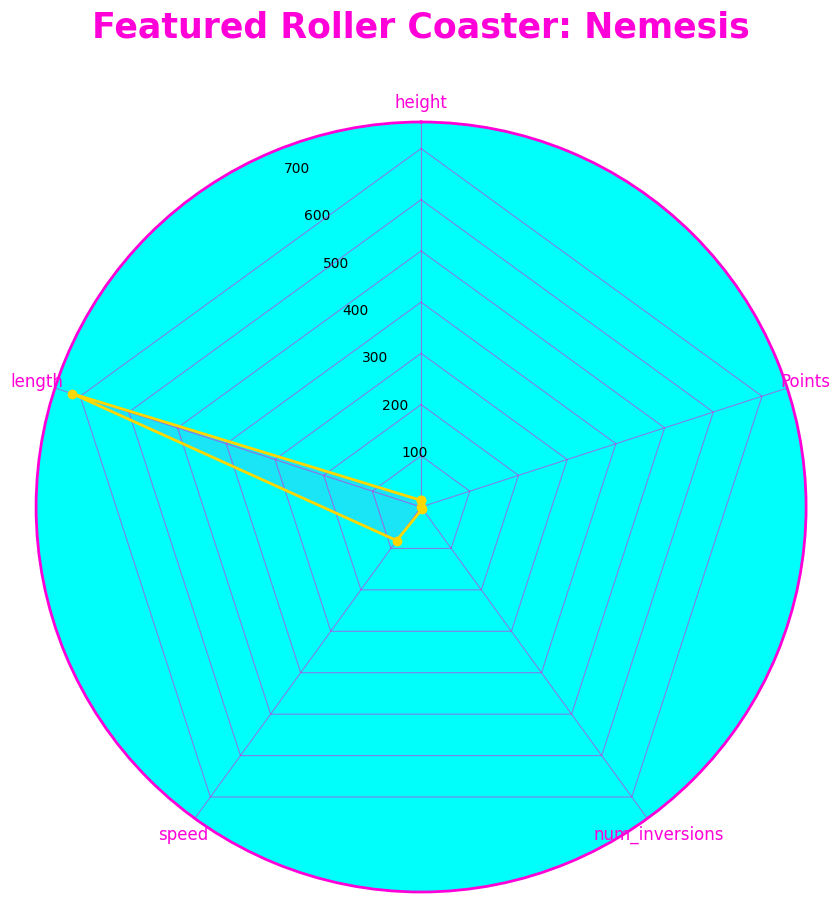

In [57]:
# test data
fig = plt.figure(figsize=(10, 10))

# add a subplot
ax = fig.add_subplot(projection='radar')

plot_radar_2(ax, df_.iloc[0])

In [58]:
df_

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,lat,lng,Year Built,geometry
153,Nemesis,Steel,Inverted,81.0,13.0,716.0,4.0,B&M,Alton Towers,status.operating,52.987437,-1.886451,1994.0,POINT (-1.88645 52.98744)
193,Raptor,Steel,Wing,90.0,33.0,770.0,3.0,B&M,Gardaland,status.operating,45.454949,10.713703,1994.0,POINT (10.71370 45.45495)
218,Cyclone,Steel,Sit Down,68.0,18.0,762.0,0.0,Charles Paige,Southport Pleasureland,status.closed.definitely,53.647679,-3.017450,1927.0,POINT (-3.01745 53.64768)
245,Wild Mouse,Steel,Sit Down,45.0,15.0,370.0,0.0,Maurer,Flamingo Land Theme Park and Zoo,status.closed.definitely,54.206512,-0.809531,1958.0,POINT (-0.80953 54.20651)
264,Wild Mouse,Wooden,Sit Down,NaN,NaN,390.0,0.0,na,Blackpool Pleasure Beach,status.closed.definitely,53.792330,-3.055293,1958.0,POINT (-3.05529 53.79233)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,Wild Mouse,na,na,NaN,NaN,NaN,0.0,na,Arnolds Park,status.construction,43.372741,-95.123884,1958.0,POINT (-95.12388 43.37274)
2802,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1938.0,POINT (-80.31659 41.63570)
2803,Blue Streak,Wooden,na,NaN,NaN,883.0,0.0,na,Conneaut Lake Park,status.operating,41.635699,-80.316587,1964.0,POINT (-80.31659 41.63570)
2811,Cyclone,Steel,Sit Down,NaN,NaN,NaN,0.0,SBF,Barry Island Pleasure Park,status.operating,51.391657,-3.274418,1927.0,POINT (-3.27442 51.39166)


In [59]:
# merge based on geometry to determine which country  and continent the roller coaster is in

# merge continet and country into df_ based on its geometry beeig inside the geometry of the world dataframe just keep continent and country


df_ = df_.sjoin(world, how="inner")



In [60]:
df_
# rename name_left to name
df_ = df_.rename(columns={"name_left": "name"})

In [61]:
df_["continent"]

153            Europe
218            Europe
245            Europe
278            Europe
835            Europe
            ...      
2521          Oceania
2268    South America
2270    South America
2333             Asia
2618             Asia
Name: continent, Length: 148, dtype: object

In [62]:
df_

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,lat,lng,Year Built,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est
153,Nemesis,Steel,Inverted,81.0,13.0,716.0,4.0,B&M,Alton Towers,status.operating,52.987437,-1.886451,1994.0,POINT (-1.88645 52.98744),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
218,Cyclone,Steel,Sit Down,68.0,18.0,762.0,0.0,Charles Paige,Southport Pleasureland,status.closed.definitely,53.647679,-3.017450,1927.0,POINT (-3.01745 53.64768),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
245,Wild Mouse,Steel,Sit Down,45.0,15.0,370.0,0.0,Maurer,Flamingo Land Theme Park and Zoo,status.closed.definitely,54.206512,-0.809531,1958.0,POINT (-0.80953 54.20651),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
278,Twister,Steel,Sit Down,47.0,13.0,420.0,0.0,Reverchon,Lightwater Valley,status.operating,54.178154,-1.565621,2011.0,POINT (-1.56562 54.17815),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
835,Thunderbolt,Steel,Sit Down,87.0,31.0,1207.0,2.0,Meisho Amusement Machines,Dreamworld,status.closed.definitely,54.122371,-6.270343,1968.0,POINT (-6.27034 54.12237),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,Wild Mouse,Wooden,Sit Down,NaN,12.0,487.0,0.0,Hopkins,Aussie World,status.closed.definitely,-26.749862,153.046514,1958.0,POINT (153.04651 -26.74986),137,2.536431e+07,Oceania,Australia,AUS,1396567
2268,Raptor,na,Inverted,NaN,NaN,NaN,NaN,Vekoma,Fantasilandia,status.operating,-33.460287,-70.662581,1994.0,POINT (-70.66258 -33.46029),10,1.895204e+07,South America,Chile,CHL,282318
2270,Wild Mouse,na,Sit Down,47.0,13.0,420.0,NaN,Zamperla,Fantasilandia,status.operating,-33.460287,-70.662581,1958.0,POINT (-70.66258 -33.46029),10,1.895204e+07,South America,Chile,CHL,282318
2333,Nitro,na,Floorless,105.0,40.0,854.0,5.0,B&M,Adlabs Imagica,status.operating,18.767940,73.282321,2001.0,POINT (73.28232 18.76794),98,1.366418e+09,Asia,India,IND,2868929


In [63]:
df_

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status,lat,lng,Year Built,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est
153,Nemesis,Steel,Inverted,81.0,13.0,716.0,4.0,B&M,Alton Towers,status.operating,52.987437,-1.886451,1994.0,POINT (-1.88645 52.98744),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
218,Cyclone,Steel,Sit Down,68.0,18.0,762.0,0.0,Charles Paige,Southport Pleasureland,status.closed.definitely,53.647679,-3.017450,1927.0,POINT (-3.01745 53.64768),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
245,Wild Mouse,Steel,Sit Down,45.0,15.0,370.0,0.0,Maurer,Flamingo Land Theme Park and Zoo,status.closed.definitely,54.206512,-0.809531,1958.0,POINT (-0.80953 54.20651),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
278,Twister,Steel,Sit Down,47.0,13.0,420.0,0.0,Reverchon,Lightwater Valley,status.operating,54.178154,-1.565621,2011.0,POINT (-1.56562 54.17815),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
835,Thunderbolt,Steel,Sit Down,87.0,31.0,1207.0,2.0,Meisho Amusement Machines,Dreamworld,status.closed.definitely,54.122371,-6.270343,1968.0,POINT (-6.27034 54.12237),143,6.683440e+07,Europe,United Kingdom,GBR,2829108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,Wild Mouse,Wooden,Sit Down,NaN,12.0,487.0,0.0,Hopkins,Aussie World,status.closed.definitely,-26.749862,153.046514,1958.0,POINT (153.04651 -26.74986),137,2.536431e+07,Oceania,Australia,AUS,1396567
2268,Raptor,na,Inverted,NaN,NaN,NaN,NaN,Vekoma,Fantasilandia,status.operating,-33.460287,-70.662581,1994.0,POINT (-70.66258 -33.46029),10,1.895204e+07,South America,Chile,CHL,282318
2270,Wild Mouse,na,Sit Down,47.0,13.0,420.0,NaN,Zamperla,Fantasilandia,status.operating,-33.460287,-70.662581,1958.0,POINT (-70.66258 -33.46029),10,1.895204e+07,South America,Chile,CHL,282318
2333,Nitro,na,Floorless,105.0,40.0,854.0,5.0,B&M,Adlabs Imagica,status.operating,18.767940,73.282321,2001.0,POINT (73.28232 18.76794),98,1.366418e+09,Asia,India,IND,2868929


In [64]:
wood

,Rank,Name,park,Location,Supplier,Year Built,Points,Year of Rank,lat,lng,geometry
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013,41.645137,-72.912420,POINT (-72.91242 41.64514)
1,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1480,2014,41.645137,-72.912420,POINT (-72.91242 41.64514)
2,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1625,2015,41.645137,-72.912420,POINT (-72.91242 41.64514)
3,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1216,2016,41.645137,-72.912420,POINT (-72.91242 41.64514)
4,3,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1171,2017,41.645137,-72.912420,POINT (-72.91242 41.64514)
...,...,...,...,...,...,...,...,...,...,...,...
118,40,Grizzly,Kings Dominion,"Doswell, Va.",Summers-KECO,1982,115,2018,37.839871,-77.444191,POINT (-77.44419 37.83987)
119,26,Renegade,Valleyfair,"Shakopee, Minn.",Great Coasters Int.,2007,182,2018,44.798743,-93.453691,POINT (-93.45369 44.79874)
120,35,Rutschebanan,Tivoli Gardens,"Copenhagen, Denmark",L.A. Thompson,1914,135,2018,55.673684,12.568147,POINT (12.56815 55.67368)
121,44,Wild One,Six Flags America,"Upper Marlboro, Md.",PTC/Miller/Dinn,1986,98,2018,38.906112,-76.772582,POINT (-76.77258 38.90611)


In [65]:
# get points, name and park from wood dataframe
wood_points = wood[["Points", "Name", "park"]].copy()
# same for steel dataframe
steel_points = golden_ticket[["Points", "Name", "park"]].copy()

In [66]:
steel_points

# add steel and wood to one dataframe
points = pd.concat([wood_points, steel_points], ignore_index=True)

In [67]:
points

# merge points with df_ based on name and park
# rename Name to name
points = points.rename(columns={"Name": "name"})
df_ = df_.merge(points, on=["name", "park"], how="left")

In [68]:
# drop duplicates based on name and park
df_ = df_.drop_duplicates(subset=["name", "park"])

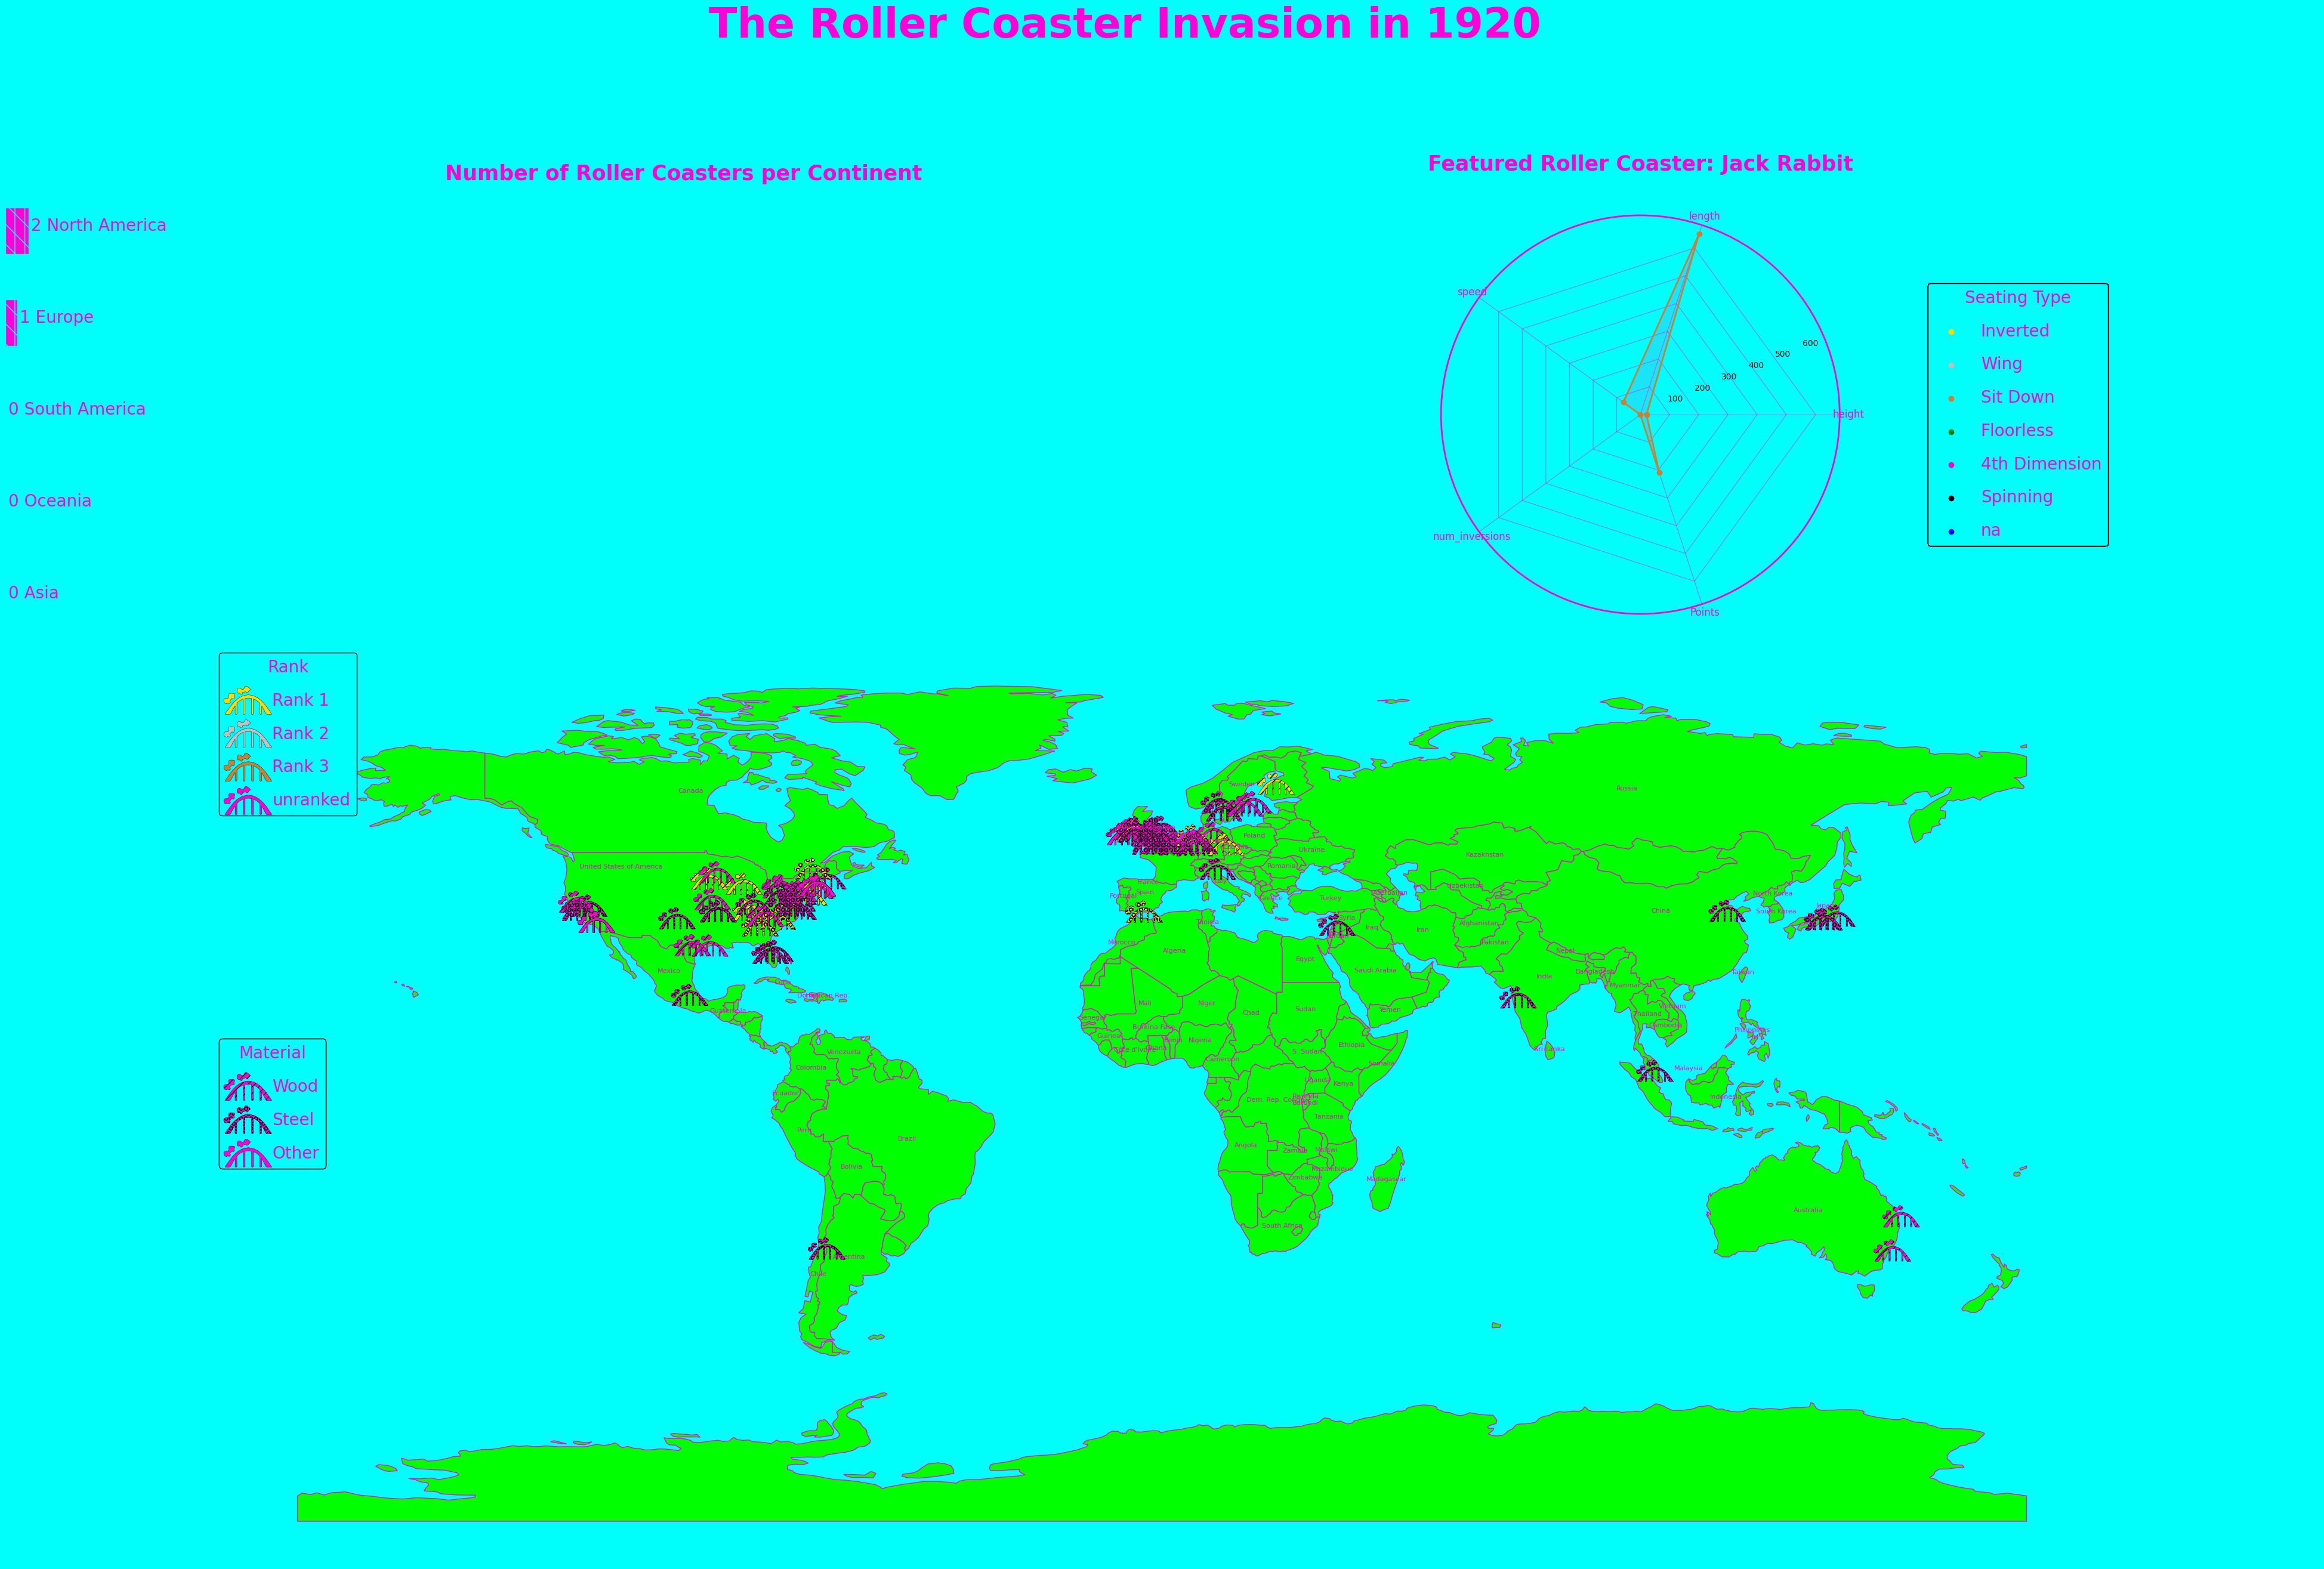

In [78]:
# load markersymbol from svg file
import matplotlib as mpl
from svgpath2mpl import parse_path
from svgpathtools import svg2paths
os.environ["PATH"] += os.pathsep + "/opt/homebrew/opt/ffmpeg/bin"
path, attributes = svg2paths("Data/Icon-roller-coaster-881334.svg")
# merge paths
paths = []
for p in path:
    paths.append(p.d())
marker = "".join(paths)
roller_coasters_marker = parse_path(marker)
# rotate marker
roller_coasters_marker = roller_coasters_marker.transformed(
    mpl.transforms.Affine2D().rotate_deg(180)
)
roller_coasters_marker.vertices -= roller_coasters_marker.vertices.mean(axis=0)
attributes = [
    "height",
    "length",
    "speed",
    "num_inversions",
    "Points",
    #"seating_type",
]
# make an animation of the roller coasters over time ion df_
# create a mosaic plot with 3 rows and 3 columns
fig = plt.figure(layout=None, facecolor="0.9", figsize=(50, 30))
gs = fig.add_gridspec(nrows=3, ncols=5, wspace=0.2, hspace=0.0)
grid = plt.GridSpec(4, 4)
# prevent plots from overlapping
ax = [None] * 9
# a[0] over the whole first row
ax[5] = fig.add_subplot(gs[0, 0:3])
# a[1] over the whole second row
ax[0] = fig.add_subplot(gs[1:3, :])
ax[1] = fig.add_subplot(gs[0, 3] , projection='radar')


# add artist to ax[0]
# flip marker
handle_1 = ax[0].scatter([], [],  color="#FFD700", marker=roller_coasters_marker,s=5000,
            edgecolor="black",
            linewidth=0.3,)
handle_2 = ax[0].scatter([], [], color="#C0C0C0", marker=roller_coasters_marker,s=5000,
            edgecolor="black",
            linewidth=0.3)
handle_3 = ax[0].scatter([], [], color="#CD7F32", marker=roller_coasters_marker,s=5000,
            edgecolor="black",
            linewidth=0.3)
# handle_4 default marker color
handle_4 = ax[0].scatter([], [], color="#ff00d8", marker=roller_coasters_marker,s=5000,
            edgecolor="black",
            linewidth=0.3)
legend1 = ax[0].legend(
    [handle_1, handle_2, handle_3, handle_4  ],
    ["Rank 1", "Rank 2", "Rank 3", "unranked"],
    loc=2,
    title="Rank",
    facecolor="#00fffb",
    edgecolor="black",
    framealpha=1,
    title_fontsize=20,
    fontsize=20,
    labelspacing=1.0,
    labelcolor="#ff00d8",
)

# change the color od the title of the legend
legend1.get_title().set_color("#ff00d8")
ax[0].add_artist(legend1)

# crwate a legend for the material
handle_5 = ax[0].scatter([], [], color="#ff00d8",  marker=roller_coasters_marker,s=5000, hatch = "///", edgecolor="black",
            linewidth=0.3,)
handle_6 = ax[0].scatter([], [], color="#ff00d8", marker=roller_coasters_marker,s=5000,hatch = "OO",edgecolor="black",
            linewidth=0.3, )
handle_7 = ax[0].scatter([], [], color="#ff00d8",  marker=roller_coasters_marker,s=5000,edgecolor="black",
            linewidth=0.3,)
legend2 = ax[0].legend(
    [handle_5, handle_6, handle_7],
    ["Wood", "Steel", "Other"],
    loc=6,
    title="Material",
    facecolor="#00fffb",
    edgecolor="black",
    framealpha=1,
    title_fontsize=20,
    fontsize=20,
    labelspacing=1.0,
    labelcolor="#ff00d8",
)
legend2.get_title().set_color("#ff00d8")
ax[0].add_artist(legend2)


# set background color for figure
fig.set_facecolor("#00fffb")
# set title
# ax[0].set_title(
#     "The Roller Coaster Invasion", fontsize=20, fontweight="bold", color="#ff00d8"
# )
world.plot(ax=ax[0], color="#00ff00", edgecolor="#ff00d8")
# annotate the name of the country
for x, y, label in zip(
    world.geometry.centroid.x, world.geometry.centroid.y, world["name"]
):
# check if population is greater than 10 million
    if world[world["name"] == label]["pop_est"].values[0] < 10000000:
        continue
    ax[0].annotate(
        label,
        xy=(x, y),
        horizontalalignment="center",
        color="#ff00d8",
        fontsize=8,
    )
years = df_["Year Built"].unique()

annotations = []

def animate(i):
    for anno in annotations:
        anno.remove()
    annotations[:] = []

    # set title for the figure
    fig.suptitle(
        "The Roller Coaster Invasion in {}".format(int(years[i])),
        fontsize=50,
        fontweight="bold",
        color="#ff00d8",
    )   
    num_coasters = df_[df_["Year Built"] <= years[i]]["continent"].value_counts()
    # plot the number of roller coasters per continent
    # sort by value
    # set the y axis to the continent
    # set the color to pink
    # get unique continents
    continents = df_["continent"].unique()  
    # add the continents missing with 0
    missing_continents = []
    for continent in continents:
        if continent not in num_coasters.index:
            num_coasters[continent] = 0
    num_coasters = num_coasters.sort_values()
    # plot the bar chart
    ax[5].cla()
    num_coasters.plot.barh(ax=ax[5], color="#ff00d8", hatch = "\\|", edgecolor="#00fffb", linewidth=0.3,)
    # remove axis labels
    ax[5].set_xlabel("")
    ax[5].set_ylabel("")
    # annote the bar with the value and the continent
    for index, value in enumerate(num_coasters):
        anno = ax[5].annotate(
            f"{value} {num_coasters.index[index]}",
            xy=(value + 0.2, index),
            horizontalalignment="left",
            color="#ff00d8",
            fontsize=20,
        )
        annotations.append(anno)
    
    # set spine color
    ax[5].spines["bottom"].set_color("#ff00d8")
    ax[5].spines["top"].set_color("#ff00d8")
    ax[5].spines["left"].set_color("#ff00d8")
    ax[5].spines["right"].set_color("#ff00d8")
    # remove the ticks
    ax[5].tick_params(axis="both", which="both", length=0)

    # add a title to the bar chart
    ax[5].set_title(
        "Number of Roller Coasters per Continent",
        fontsize=25,
        fontweight="bold",
        color="#ff00d8",
    )

    # set x axis limit
    ax[5].set_xlim(0, 120)
    # remove x and y axis labels
    ax[5].axis("off")
    
    
    # plot the world colored green and the edges colored red color the ocean blue
    hatch = ""
    # plot the roller coasters for the year in df_
    cllr = "#ff00d8"
    for index, row in df_[df_["Year Built"] == years[i]].iterrows():
        # check if the roller coaster is made of wood or steel
        if row["material_type"] == "Steel":
            hatch = 'OO'
            # check if the roller coaster is a winner by looking at the rank in golden_ticket df
            if row["name"] in golden_ticket["Name"].values:
                # get the rank of the roller coaster
                rank = golden_ticket[golden_ticket["Name"] == row["name"]].sort_values(by = "Rank", ascending=True)[
                    "Rank"
                ].values[0]
                # plot the roller coaster with the correct color
                if rank <= 3:
                    cllr = colors[rank-1]

        elif row["material_type"] == "Wooden":
            hatch = "///"
            # check if the roller coaster is a winner by looking at the rank in wood df
            if row["name"] in wood["Name"].values:
                # get the rank of the roller coaster
                rank = wood[wood["Name"] == row["name"]].sort_values(by = "Rank", ascending=True)["Rank"].values[0]
                # plot the roller coaster with the correct color
                if rank <= 3:
                    cllr = colors[rank-1]

        ax[0].scatter(
            row["geometry"].x,
            row["geometry"].y,
            marker=roller_coasters_marker,
            s=3000,
            color=cllr,
            hatch = hatch,
            edgecolor="black",
            linewidth=0.3,
        )
    ax[0].axis("off")
    fig.set_facecolor("#00fffb")

    # polar plots of for featured roller coasters
    # get the roller coasters for the year
    roller_coasters = df_[df_["Year Built"] == years[i]]
   # remove duplicates
    roller_coasters = roller_coasters.drop_duplicates(subset="name")
    # reset index
    roller_coasters = roller_coasters.reset_index(drop=True)
    # shuffle the roller coasters
    roller_coasters = roller_coasters.sample(frac=1).reset_index(drop=True)
    # try to get the points for the roller
    # drop nan values except for num_inversions, height, speed, length, and drop_duplicates
    roller_coasters = roller_coasters.dropna(subset=["num_inversions", "height", "speed", "length"])
    roller_coasters = roller_coasters.drop_duplicates(subset="name")

    # check if there are enough roller coasters
    if len(roller_coasters) == 0:
        return
    # plot as polar plots
    ax[1].cla()
    # remove the ticks
    ax[1].tick_params(axis="both", which="both", length=0)


    plot_radar_2(ax[1], roller_coasters.iloc[0])
    
    handles = []
    for i in range(len(seating_types)):
        handles.append(
            plt.scatter(
                [],
                [],
                color=color_dict_s[seating_types[i]],
                label=seating_types[i],
            )
        )

    fake = fig.add_subplot(gs[0, 4],frameon=False)
    fake.cla()
    # remove the ticks
    fake.tick_params(axis="both", which="both", length=0)
    # remove the axis
    fake.axis("off")
    
    # to legend next to the plot
    legend_fake = fake.legend(
    handles=handles,
    loc="center left",
    #bbox_to_anchor=(1.05, 0.5),
    facecolor="#00fffb",
    edgecolor="black",
    framealpha=1,
    title_fontsize=20,
    fontsize=20,
    labelspacing=1.0,
    labelcolor="#ff00d8",
    title="Seating Type",
    bbox_transform=fig.transFigure
    )
    legend_fake.get_title().set_color("#ff00d8")


# create animation
# sort years
years = np.sort(years)
anim = FuncAnimation(fig, animate, frames=len(years), interval=1000)
from matplotlib import animation
writer=animation.FFMpegWriter(bitrate=8000, fps=1)
# save as mp4 in high quality dpi
anim.save("Data/roller_coasters.mp4", writer=writer, dpi = 300)

In [73]:
# shpow the video
from IPython.display import HTML
HTML("""
<video width="640" height="480" controls>
    <source src="roller_coasters.mp4" type="video/mp4">
</video>
""")
